<a href="https://colab.research.google.com/github/psshri/aryabhatta_robotics/blob/master/task_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83

In [1]:
!pip install opencv-python==3.4.2.16

In [2]:
!pip install opencv-contrib-python==3.4.2.16

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange


In [0]:
img_ = cv2.imread('IMG_0380.jpg')
##img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)


## cv2.cvtColor convert the input rgb image into its grayscale form 

img = cv2.imread('IMG_0379.jpg')
##img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

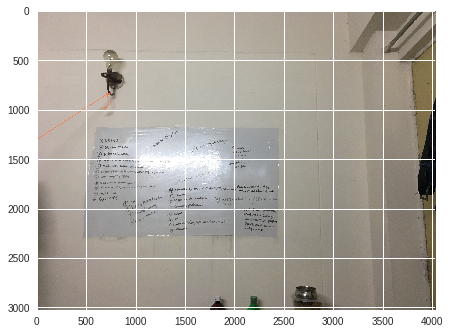

In [14]:
plt.imshow(img1)
plt.show()

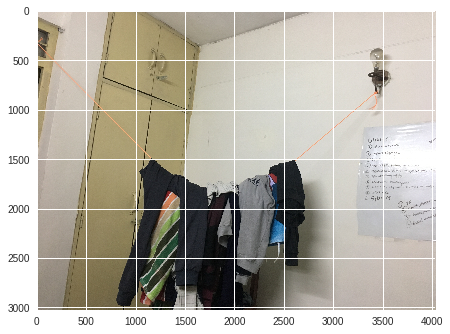

In [15]:
plt.imshow(img2)
plt.show()

In [16]:
img1.shape, img2.shape

((3024, 4032, 3), (3024, 4032, 3))

In [0]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [0]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [0]:
# Apply ratio test
good = []
for m in matches:
  if m[0].distance < 0.5*m[1].distance:
    good.append(m)
matches = np.asarray(good)

In [20]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)

    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    print(H)
else:
    raise AssertionError("Can't find enough keypoints.")  

[[ 3.55114900e-01  4.62943752e-02  2.69237839e+03]
 [-2.78759752e-01  8.75174529e-01  1.95176062e+02]
 [-1.64645386e-04 -3.99005244e-06  1.00000000e+00]]


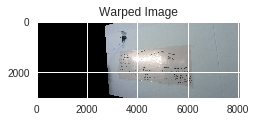

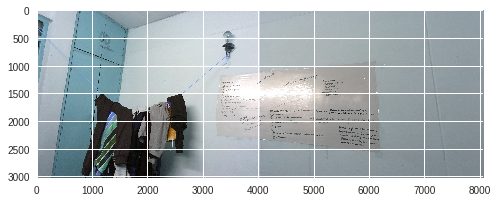

In [21]:

dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))     	
plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('0380_0379.jpg',dst)
plt.imshow(dst)
plt.show()

https://www.pyimagesearch.com/2016/01/11/opencv-panorama-stitching/

this is also a great source